Rate of transcription, lambda = 2

Total time, T = 10

Therefore, the average number of mRNA produced in time T,

mu = lambda*T = 20

Let's divide the total time in 1000 time steps. So, number of time steps, N = 1000.

Following binomial distribution,
mu = p* N, here p is the probability of production of one mRNA at a particular interval

So, p = mu/N = 20/1000 = 0.02


In [86]:
# Inputs for simulation

# Number of time steps 
time_steps = 1000

# Probability of head
p = 0.02

# Initial number of mRNA
m0 = 0

# Number of repeats of the experiment
N = 1000

1000

In [87]:
# Get required packages
using Random
using Plots
using Statistics

In [88]:
# This function simulate transcrition as seriese of coin tosses
# Inputs:
# time_steps: Number of discrete time points
# p: probability of having a mRNA at a time point

function transcription_toss(time_steps, p, m0)

    # Do T coin tosses with probability p
    # Store the cumulative count
    num_mRNA_cumulative = cumsum(rand(time_steps) .<= p)

    # Prepend the initial count m0
    return [m0; num_mRNA_cumulative .+ m0]
end

transcription_toss (generic function with 1 method)

In [89]:
# perform one simulation
mRNA_count = transcription_toss(time_steps,p, m0)

# Print result
println("Number of mRNA produced = ", mRNA_count[end])



Number of mRNA produced = 27


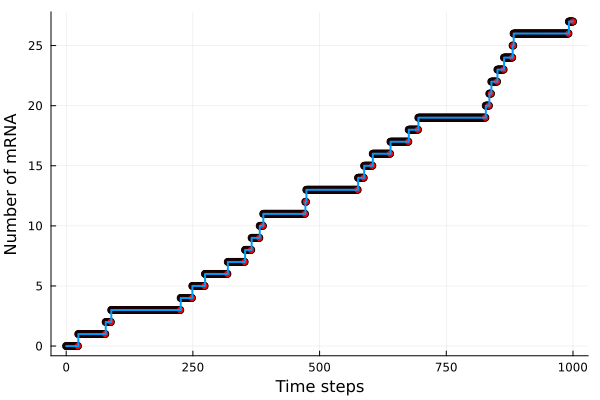

In [90]:
# Plot the data
plot(0:time_steps, mRNA_count, 
    xlabel="Time steps", ylabel="Number of mRNA", 
    scatter=:auto, marker=:circle, markercolor=:red, 
    lw=2, line=:steppost, 
    legend=:none)



In [91]:
# Perform multiple repeats of the simulation

# Data holder
data = zeros(time_steps + 1, N)

# Do simulations
for j in 1:N
    data[:,j] = transcription_toss(time_steps,p, m0)
end


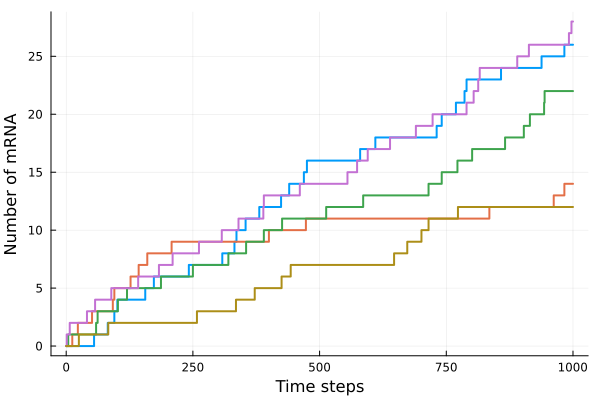

In [92]:
# Plot result few independent runs

plot(0:time_steps, data[:, 1:5], 
    xlabel="Time steps", ylabel="Number of mRNA", 
    lw=2, line=:steppost, 
    legend=:none)


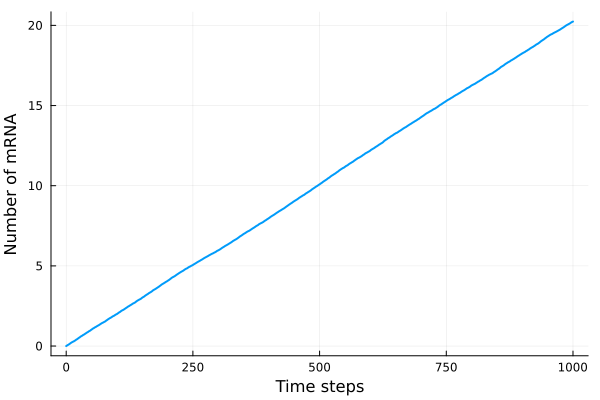

In [93]:
# Plot the average of multiple simulations

# Get the row average of the data matrix
avg_data = mean(data, dims = 2)

# Plot the average data
plot(0:time_steps, avg_data, 
    xlabel="Time steps", ylabel="Number of mRNA", 
    lw=2, 
    legend=:none)

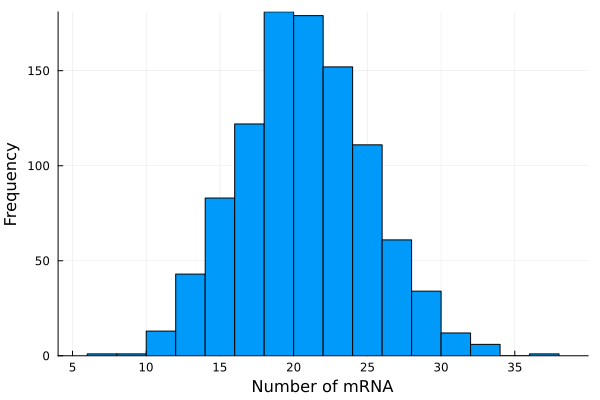

In [94]:
# Plot histogram to show distribution of mRNA in cells at the end

# Extract the last row
final_mRNA = data[end, :]

# Plot the histogram
histogram(final_mRNA, bins=20,  xlabel="Number of mRNA", ylabel="Frequency", legend=:none)

In [95]:
savefig("histogram_1.png")

"/home/ubuntu/bbwork/icsbworkshop/histogram_1.png"